## Exploratory Data Analysis: Amazon Pet Products reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
import os

In [2]:
os.chdir("/mnt/c/Users/diego/OneDrive/Documentos/Data science projects/nlp 2/petsentiment_analysis")

In [3]:
data = pd.read_csv("data/raw/balanced_data.csv")
data.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,True
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,True
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,True
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,True
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302400 entries, 0 to 302399
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             302400 non-null  float64
 1   title              302400 non-null  object 
 2   text               302400 non-null  object 
 3   asin               302400 non-null  object 
 4   parent_asin        302400 non-null  object 
 5   user_id            302400 non-null  object 
 6   timestamp          302400 non-null  object 
 7   helpful_vote       302400 non-null  int64  
 8   verified_purchase  302400 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 18.7+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,302400.0,2.999815,1.414204,1.0,2.0,3.0,4.0,5.0
helpful_vote,302400.0,0.414220,1.851932,0.0,0.0,0.0,0.0,466.0


In [6]:
data.describe(include = object).T

,count,unique,top,freq
title,302400,206884,Disappointed,915
text,302400,294669,,1071
asin,302400,107443,B0BMBC1FJX,631
parent_asin,302400,63974,B0BMBC1FJX,631
user_id,302400,255604,AH7OPR5CWTXCRWYECY34T62KA2QA,63
timestamp,302400,299767,2023-01-08 21:50:14.135000+00:00,9


#### Check for the existence of null values and duplicates

In [7]:
print("Null values by column:")
print(data.isnull().sum())

Null values by column:
rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [8]:
print("Duplicate values:")
print(data.duplicated().sum())

Duplicate values:
2629


#### Remove duplicate values

In [9]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


#### View the rating distribution

The dataset was previously balanced to achieve better results when training models.

/tmp/ipykernel_4111/598743582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data["rating"], palette = "inferno")


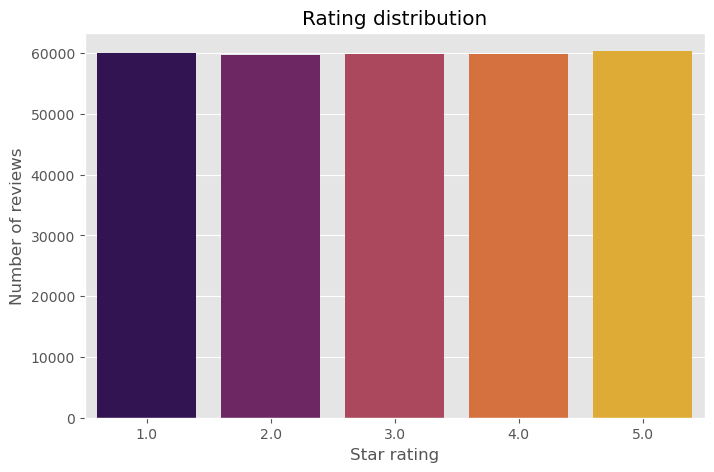

In [10]:
plt.figure(figsize = (8,5))
sns.countplot(x = data["rating"], palette = "inferno")
plt.title("Rating distribution")
plt.xlabel("Star rating")
plt.ylabel("Number of reviews")
plt.show()

#### Analysis of Helpful Votes

/tmp/ipykernel_4111/4100735549.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data["helpful_vote"], bins=30, kde=True , palette = "inferno")


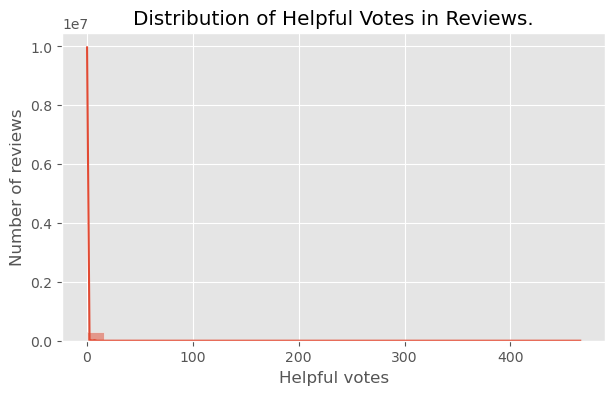

In [11]:
plt.figure(figsize=(7,4))
sns.histplot(data["helpful_vote"], bins=30, kde=True , palette = "inferno")
plt.title("Distribution of Helpful Votes in Reviews.")
plt.xlabel("Helpful votes")
plt.ylabel("Number of reviews")
plt.show()

/tmp/ipykernel_4111/359809865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["rating"], y=data["helpful_vote"], palette="inferno")


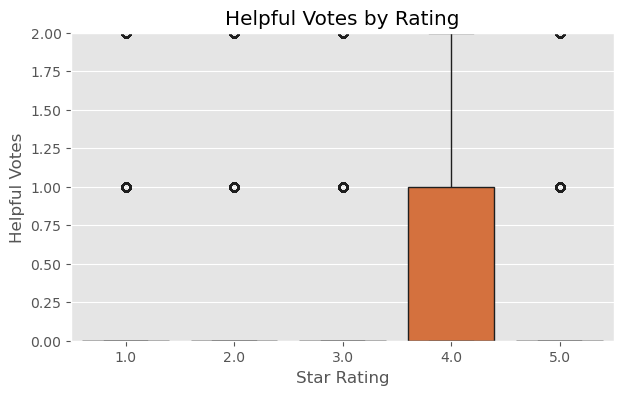

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(x=data["rating"], y=data["helpful_vote"], palette="inferno")
plt.title("Helpful Votes by Rating")
plt.xlabel("Star Rating")
plt.ylabel("Helpful Votes")
plt.ylim(0, data["helpful_vote"].quantile(0.95)) 
plt.show()

#### Analysis of Verified Purchases

/tmp/ipykernel_4111/4253661383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["verified_purchase"], palette="Blues")


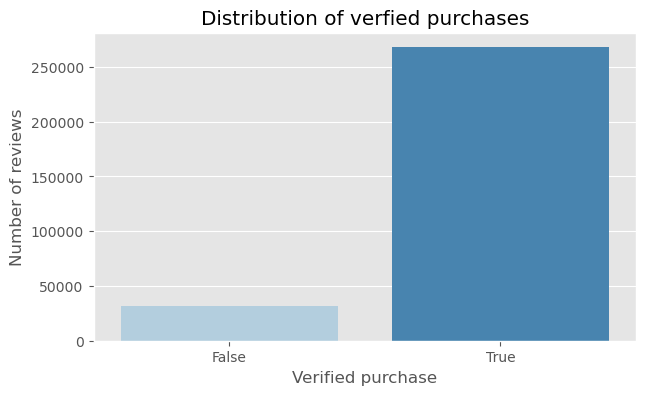

In [13]:
plt.figure(figsize=(7,4))
sns.countplot(x=data["verified_purchase"], palette="Blues")
plt.title("Distribution of verfied purchases")
plt.xlabel("Verified purchase")
plt.ylabel("Number of reviews")
plt.show()

/tmp/ipykernel_4111/1503880966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["verified_purchase"], y=data["rating"], palette="Blues")


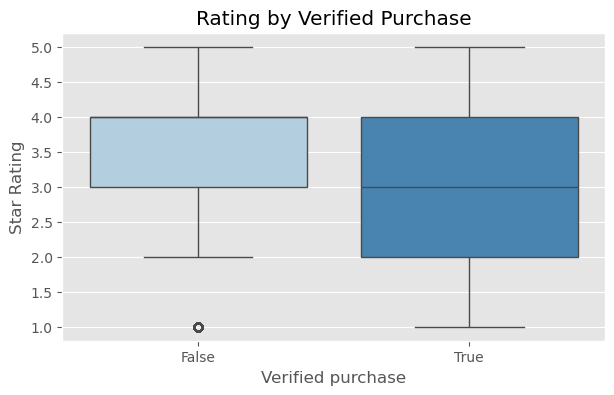

In [14]:
plt.figure(figsize=(7,4))
sns.boxplot(x=data["verified_purchase"], y=data["rating"], palette="Blues")
plt.title("Rating by Verified Purchase")
plt.xlabel("Verified purchase")
plt.ylabel("Star Rating")
plt.show()

/tmp/ipykernel_4111/2520771551.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["month"] = data["timestamp"].dt.to_period("M")


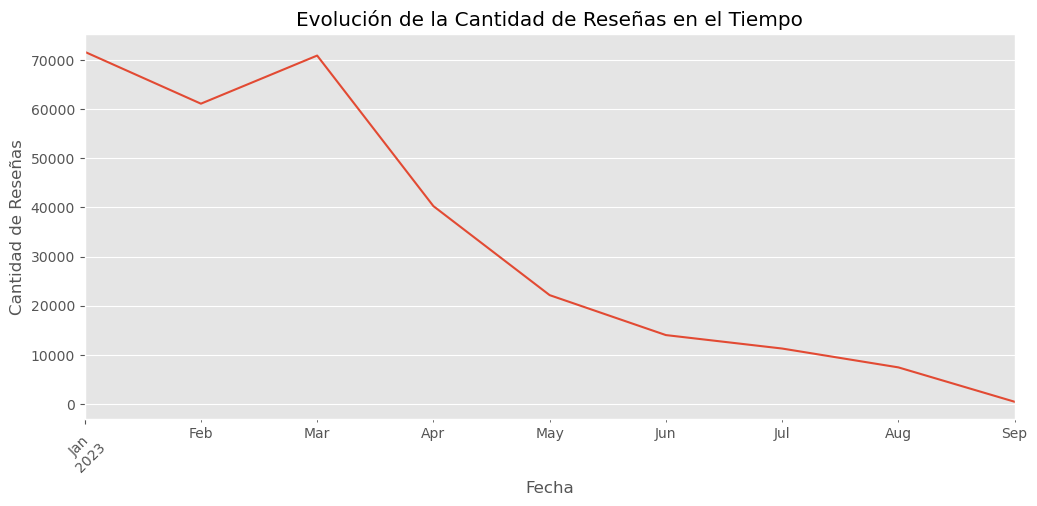

In [15]:
# Convertir timestamp a fecha
data["timestamp"] = pd.to_datetime(data["timestamp"], errors="coerce")

# Contar reseñas por mes
data["month"] = data["timestamp"].dt.to_period("M")
reviews_per_month = data.groupby("month")["rating"].count()

# Graficar la evolución de reseñas
plt.figure(figsize=(12,5))
reviews_per_month.plot()
plt.title("Evolución de la Cantidad de Reseñas en el Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Reseñas")
plt.xticks(rotation=45)
plt.show()


In [16]:
# Cargar los datos de tu dataset (asegúrate de tener la columna 'timestamp' con la fecha de compra)
# Asegurar que la columna de fecha tenga el formato correcto
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Extraer el mes y el año
data['year_month'] = data['timestamp'].dt.to_period('M')

# Contar la cantidad de compras (o reseñas) por producto en cada mes
monthly_sales = data.groupby(['year_month', 'parent_asin']).size().reset_index(name='purchase_count')

# Obtener el producto más comprado por cada mes
top_products_per_month = monthly_sales.loc[monthly_sales.groupby('year_month')['purchase_count'].idxmax()].reset_index(drop = True)

# Mostrar el resultado final agrupado por mes
top_products_per_month.head(10)


/tmp/ipykernel_4111/3536199634.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['timestamp'].dt.to_period('M')


,year_month,parent_asin,purchase_count
0,2023-01,B0C2Q4V8TR,154
1,2023-02,B0BHRZYNTS,106
2,2023-03,B0BMBC1FJX,121
3,2023-04,B0BMBC1FJX,146
4,2023-05,B0BMBC1FJX,99
5,2023-06,B0BMBC1FJX,69
6,2023-07,B0BMBC1FJX,48
7,2023-08,B0BMBC1FJX,28
8,2023-09,B0BN7S6HBS,3


In [17]:
data["cleaned_text"] = data["text"].str.lower()

In [18]:
data["cleaned_text"] = data["cleaned_text"].str.replace('[^\\w\\s]', '')

In [19]:
data["cleaned_text"] = data["cleaned_text"].str.replace('\\d', '')

In [20]:
data["text_length"] = data["cleaned_text"].astype(str).apply(len)
data["text_word_count"] = data["cleaned_text"].astype(str).apply(lambda x: len(x.split()))

In [21]:
data.head()

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,month,year_month,cleaned_text,text_length,text_word_count
0,1.0,Not durable,Opened this and gave to my two medium size dog...,B0002ASNMU,B0BM21F82G,AFZ7XMWG6DXKI63EPOBPK7W7QIEQ,2023-02-22 02:35:57.945000+00:00,0,True,2023-02,2023-02,opened this and gave to my two medium size dog...,144,30
1,1.0,Warranty is a joke.,My dog chewed through this harness on about 3 ...,B00A7EXS5I,B07BRJF2SW,AFUORUIMJALPSG3VUWSXY2FMSDQA,2023-05-13 19:22:01.561000+00:00,2,True,2023-05,2023-05,my dog chewed through this harness on about 3 ...,318,62
2,1.0,Didn’t work,It didn’t work at all for my dog he is 30 lbs ...,B08MVBDV5V,B0C1VH3V99,AHXF542MTZNBO3VN67NF5VXLZ45Q,2023-07-05 04:08:21.669000+00:00,0,True,2023-07,2023-07,it didn’t work at all for my dog he is 30 lbs ...,125,26
3,1.0,Function,Cats didn’t use it😞,B093F6CV44,B094NHVKFN,AH42DXAG6RD24MH5KACH2Q3SQ73A,2023-02-03 18:09:01.735000+00:00,0,True,2023-02,2023-02,cats didn’t use it😞,19,4
4,1.0,Only squeezed twice.,Felt didn’t last. Squeaker stopped working aft...,B07P5PRRY5,B0B8BM4GS6,AFVSG4S2POGC5IENQGGBOPBQQ7VA,2023-02-25 20:15:10.152000+00:00,0,True,2023-02,2023-02,felt didn’t last. squeaker stopped working aft...,82,12


In [32]:
data["text_word_count"].sort_values(ascending= False)

57335     2665
171693    1997
69414     1622
45838     1605
226476    1556
          ... 
236383       0
275354       0
112551       0
17085        0
252084       0
Name: text_word_count, Length: 299771, dtype: int64

In [33]:
size_counts = data['text_word_count'].value_counts().sort_index()
print(size_counts)


text_word_count
0       1062
1       1705
2       3491
3       3639
4       4616
        ... 
1556       1
1605       1
1622       1
1997       1
2665       1
Name: count, Length: 669, dtype: int64


In [39]:
data["text_word_count"].describe().T

count    299771.000000
mean         45.030607
std          51.039036
min           0.000000
25%          15.000000
50%          31.000000
75%          57.000000
max        2665.000000
Name: text_word_count, dtype: float64

In [43]:
data["text_word_count"].quantile(0.95)

132.0

nlp = spacy.load("en_core_web_sm")

def stopwords(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

data["cleaned_text"] = data["cleaned_text"].apply(stopwords)

import re
import pandas as pd
import html
import spacy

# Funciones de preprocesamiento simples
def lower_text(text: str) -> str:
    return text.lower()

def strip_text(text: str) -> str:
    return text.strip()

def unescape_html(text: str) -> str:
    return html.unescape(text)

def remove_punctuation(text: str) -> str:
    return re.sub(r"[^\w\s]", "", text)

def remove_special_characters(text: str) -> str:
    return re.sub("[^a-zA-Z0-9\s]", "", text)

def remove_html_tags(text: str) -> str:
    return re.sub("<.*?>", "", text)

# Lista de funciones de preprocesamiento que se aplicarán al texto
PREPROCESSING_FUNCTIONS = [
    lower_text, strip_text, remove_special_characters,
    remove_punctuation, unescape_html, remove_html_tags
]

# Eliminar stopwords usando spaCy
def remove_stopwords(nlp: spacy.language.Language, text: str) -> str:
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

# Lematizar y eliminar stopwords
def lemmatize_and_remove_stopwords(nlp: spacy.language.Language, text: str) -> str:
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

# Función principal para procesar un lote de textos
def process_texts(nlp: spacy.language.Language, texts: pd.Series) -> pd.Series:
    # Preprocesar los textos (aplicar las funciones en PREPROCESSING_FUNCTIONS)
    def apply_preprocessing(text: str) -> str:
        for func in PREPROCESSING_FUNCTIONS:
            text = func(text)
        return text

    # Aplicar preprocesamiento a todos los textos
    preprocessed_texts = texts.apply(apply_preprocessing)
    
    # Aplicar lematización y eliminar stopwords
    processed_texts = preprocessed_texts.apply(lambda text: lemmatize_and_remove_stopwords(nlp, text))

    return processed_texts
